<a href="https://colab.research.google.com/github/lucaspn017/using_statistical_descriptions/blob/main/Sele%C3%A7%C3%A3o_de_modelos_de_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# **Passo 1**: Selecionar as **variáveis explicativas** e verificar como elas se relacionam com a **variável resposta**.

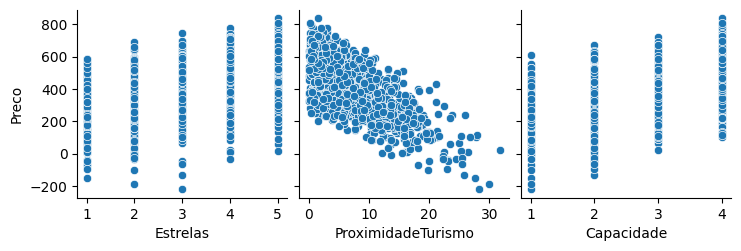

In [42]:
hoteis = pd.read_csv('/content/hoteis.csv')
hoteis_df = pd.DataFrame(hoteis)
sns.pairplot(hoteis_df, x_vars=['Estrelas', 'ProximidadeTurismo', 'Capacidade'], y_vars='Preco')

# **Passo 2**: Dividir as variáveis em dados de treino e teste do modelo.

In [43]:
y = hoteis_df['Preco'] #Variável resposta
x = hoteis_df.drop(columns='Preco') #Variável explicativa

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 230)
df_train = pd.DataFrame(data=X_train)
df_train['Preco'] = y_train
print(hoteis_df.columns)

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')


# **Passo 3**: Construir o modelo de regressão linear.

*   **3.1** Verificar relações simples entre **duas variáveis**.

In [44]:
modelo_0 = ols('Estrelas ~ Preco', data = df_train).fit()
modelo_1 = ols('ProximidadeTurismo ~ Preco', data = df_train ).fit()
modelo_2 = ols('Capacidade ~ Preco', data = df_train).fit()
print(f'R² do Modelo 0 : {modelo_0.rsquared}')
print(f'R² do Modelo 1 : {modelo_1.rsquared}')
print(f'R² do Modelo 2 : {modelo_2.rsquared}')

# O modelo 1 possui a maior R². Ou seja, o maior nível de explicabilidade
# entre os concorrentes.

R² do Modelo 0 : 0.15499226890449158
R² do Modelo 1 : 0.4862217617831248
R² do Modelo 2 : 0.27672621370602113


In [45]:
print(modelo_0.summary())
print(modelo_1.summary())
print(modelo_2.summary())

# Todos os modelos possuem forte colinearidade.

                            OLS Regression Results                            
Dep. Variable:               Estrelas   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           2.27e-27
Time:                        10:17:10   Log-Likelihood:                -1169.0
No. Observations:                 700   AIC:                             2342.
Df Residuals:                     698   BIC:                             2351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7645      0.124     14.197      0.0


*  **3.2** Adicionar variáveis.





In [46]:
X1 = hoteis_df[['Estrelas']]
X1 = sm.add_constant(X1)
modelo_0 = sm.OLS(y, X1).fit()

X2 = hoteis_df[['Estrelas','ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_1 = sm.OLS(y, X2).fit()

X3 = hoteis_df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3= sm.add_constant(X3)
modelo_2 = sm.OLS(y, X3).fit()

print(modelo_0.summary())
print(modelo_1.summary())
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           6.09e-40
Time:                        10:17:13   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517     11.752     21.218      0.0